In [1]:
#install the required libraries
!pip install nltk

In [2]:
#import libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import pandas as pd
import wordcloud as wc
from wordcloud import WordCloud, STOPWORDS
import requests
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hinal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Generating the Sentiments

In [3]:
#read the data
df = pd.read_csv("mining.csv")
df.head()

,Unnamed: 0,title,media,date,datetime,desc,link,img
0,0,Newark Airport Will No Longer Be A NYC Airport...,Simple Flying,1 month ago,2022-09-30 18:15:07.914922,What changes now that EWR will not fall under ...,https://simpleflying.com/newark-iata-nyc-airport/,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,1,IATA To Cut Newark Airport Out Of The New York...,AVweb,1 month ago,2022-09-30 18:15:07.924601,"EWR). Aside from bragging rights, a memorandum...",https://www.avweb.com/aviation-news/iata-to-cu...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,2,Newark airport will no longer be NYC-area airp...,News 12 New Jersey,1 month ago,2022-09-30 18:15:07.933801,"However, airlines could charge a penalty fee f...",https://newjersey.news12.com/newark-liberty-in...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,3,Spirit adds daily nonstop between OAK and Newa...,Oakland Airport,"ar 24, 2022",NaN,EWR is the eighth destination now offered by S...,https://www.oaklandairport.com/spirit-adds-dai...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,4,Newark Airport Is Officially No Longer a New Y...,Matador Network,1 month ago,2022-09-30 18:15:07.948707,"For one, flying into EWR might cause flight pr...",https://matadornetwork.com/read/newark-airport...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [4]:
#get the row and column counts
df.shape

(517, 8)

In [5]:
#function to generate the sentiment analysis report
def sentimentanalyses(body):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(body)
    if(scores.get('compound') >= 0.5):
        return('Positive')
    return('Negative')

In [6]:
#get the sentiment based 
df['Sentiment'] = df['desc'].apply(lambda x: sentimentanalyses(x))
df.head()

,Unnamed: 0,title,media,date,datetime,desc,link,img,Sentiment
0,0,Newark Airport Will No Longer Be A NYC Airport...,Simple Flying,1 month ago,2022-09-30 18:15:07.914922,What changes now that EWR will not fall under ...,https://simpleflying.com/newark-iata-nyc-airport/,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Positive
1,1,IATA To Cut Newark Airport Out Of The New York...,AVweb,1 month ago,2022-09-30 18:15:07.924601,"EWR). Aside from bragging rights, a memorandum...",https://www.avweb.com/aviation-news/iata-to-cu...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Negative
2,2,Newark airport will no longer be NYC-area airp...,News 12 New Jersey,1 month ago,2022-09-30 18:15:07.933801,"However, airlines could charge a penalty fee f...",https://newjersey.news12.com/newark-liberty-in...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Negative
3,3,Spirit adds daily nonstop between OAK and Newa...,Oakland Airport,"ar 24, 2022",NaN,EWR is the eighth destination now offered by S...,https://www.oaklandairport.com/spirit-adds-dai...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Negative
4,4,Newark Airport Is Officially No Longer a New Y...,Matador Network,1 month ago,2022-09-30 18:15:07.948707,"For one, flying into EWR might cause flight pr...",https://matadornetwork.com/read/newark-airport...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Negative


In [7]:
#get the positive to negative ratio
pos_count = df.desc[df["Sentiment"]=="Positive"].count()
neg_count = df.desc[df["Sentiment"]=="Negative"].count()
print("The positive to negative tweets ratio is:", pos_count, ":", neg_count)

The positive to negative tweets ratio is: 164 : 353


### Generating Word cloud

In [8]:
#initialize the required variables
comment_words_positive = ''
comment_words_negative = ''
stopwords = set(STOPWORDS)

In [9]:
pos = pd.DataFrame(df.desc[df["Sentiment"]=="Positive"])
neg = pd.DataFrame(df.desc[df["Sentiment"]=="Negative"])
for val_pos, val_neg in zip(pos.desc,neg.desc):
    print(str(val_pos))
    print("----------------------------------------------")
    print(str(val_neg))

What changes now that EWR will not fall under NYC? United Airlines aircraft 
at EWR, New York City skyline in the background Photo: United Airlines.
----------------------------------------------
EWR). Aside from bragging rights, a memorandum reportedly released by 
Lufthansa could offer some clarity on what it could mean for airline 
passengers. As...
... ambitious Vision Plan for future development of Newark Liberty 
International Airport (EWR), working in partnership with Skidmore, Owings & 
Merill (SOM).
----------------------------------------------
However, airlines could charge a penalty fee for switching flights from EWR 
to JFK or LGA since it's no longer under that city code. Share this story.
This winter, Air France will launch a non-stop service from Paris-Charles 
de Gaulle to New York-Newark Liberty (EWR), in addition to its service 
to/from New...
----------------------------------------------
EWR is the eighth destination now offered by Spirit Airlines at OAK. 
Oakland,

In [10]:
#Tokenization
pos = pd.DataFrame(df.desc[df["Sentiment"]=="Positive"])
neg = pd.DataFrame(df.desc[df["Sentiment"]=="Negative"])
for val_pos, val_neg in zip(pos.desc,neg.desc):
    val_pos = str(val_pos)
    val_neg = str(val_neg)
    tokens_pos = val_pos.split()
    tokens_neg = val_neg.split()
    for i in range(len(tokens_pos)): 
        tokens_pos[i] = tokens_pos[i].lower()
    for i in range(len(tokens_neg)): 
        tokens_neg[i] = tokens_neg[i].lower()
    comment_words_positive += " ".join(tokens_pos)+" "
    comment_words_negative += " ".join(tokens_neg)+" "    

In [11]:
#Give shape to the word cloud
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=wc.get_single_color_func('green'),
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words_positive)
wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=wc.get_single_color_func('red'),
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words_negative)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

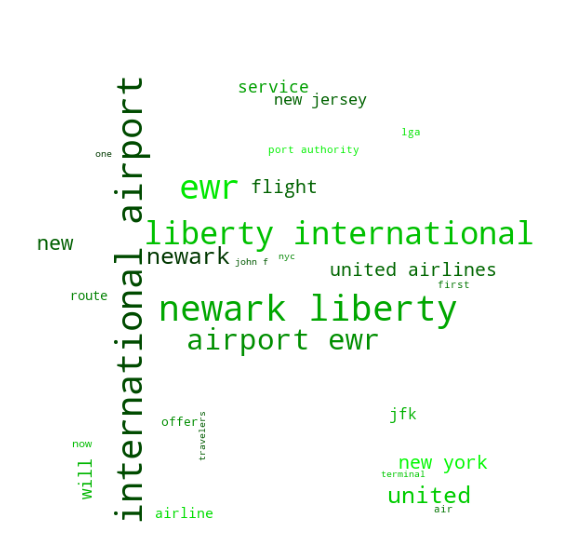

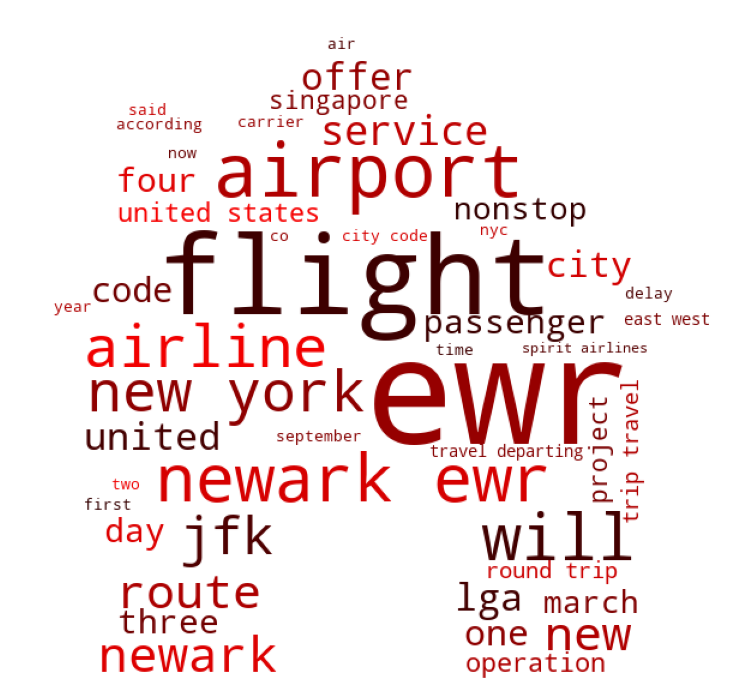

In [12]:
#generate word cloud
import matplotlib.pyplot as plt
import  numpy as np
from PIL import Image
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud_negative, cmap='Accent')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Generate Word Frequency

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hinal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

C:\Users\hinal\AppData\Local\Temp/ipykernel_2600/370604067.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))


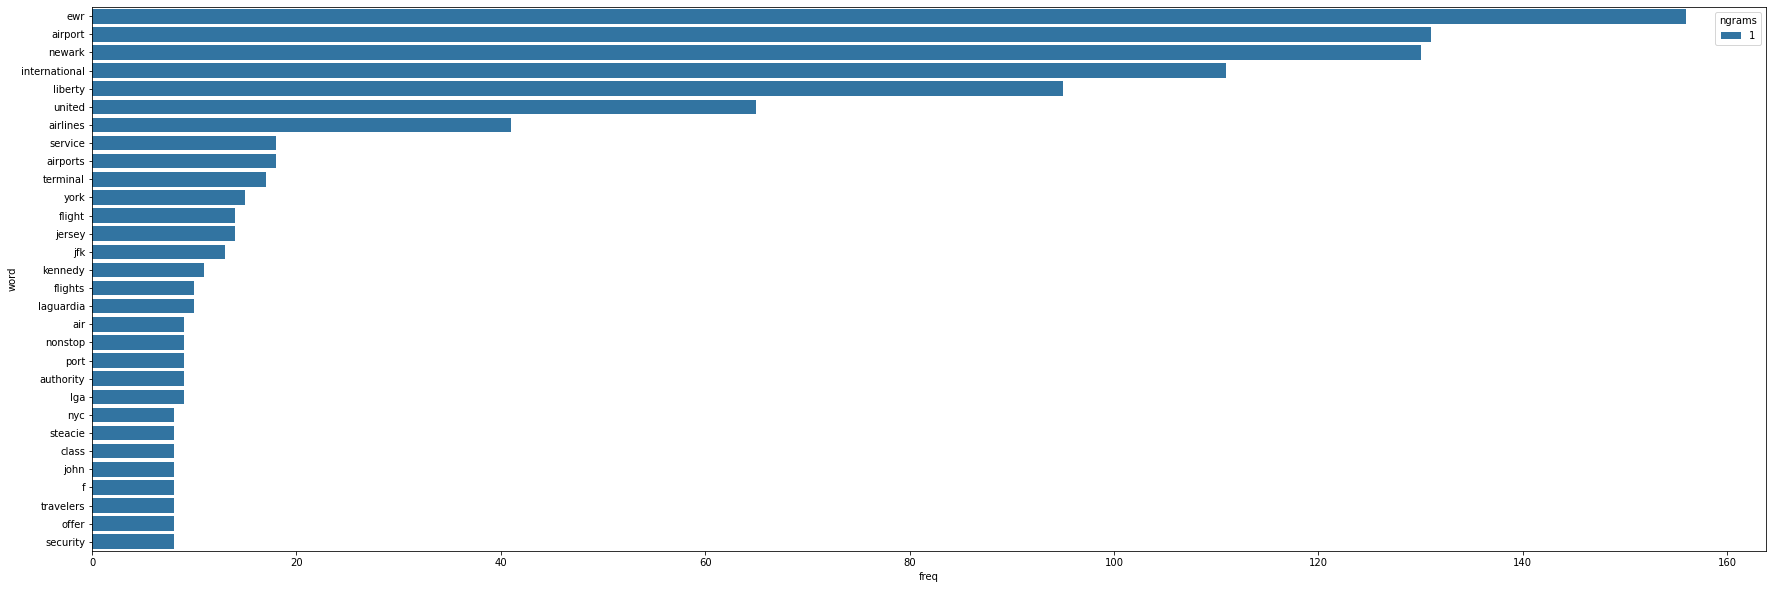

In [13]:
#positive word frequency
from nltk.corpus import stopwords
nltk.download('stopwords')

text = comment_words_positive
new_text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
text_tokens = word_tokenize(new_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
    dic_words_freq = nltk.FreqDist(nltk.ngrams(tokens_without_sw, n))
    dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
    dtf_n["ngrams"] = n
    dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: "".join(string for string in x) )
    dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
## plot
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

<IPython.core.display.Javascript object>

C:\Users\hinal\AppData\Local\Temp/ipykernel_2600/2861666918.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))


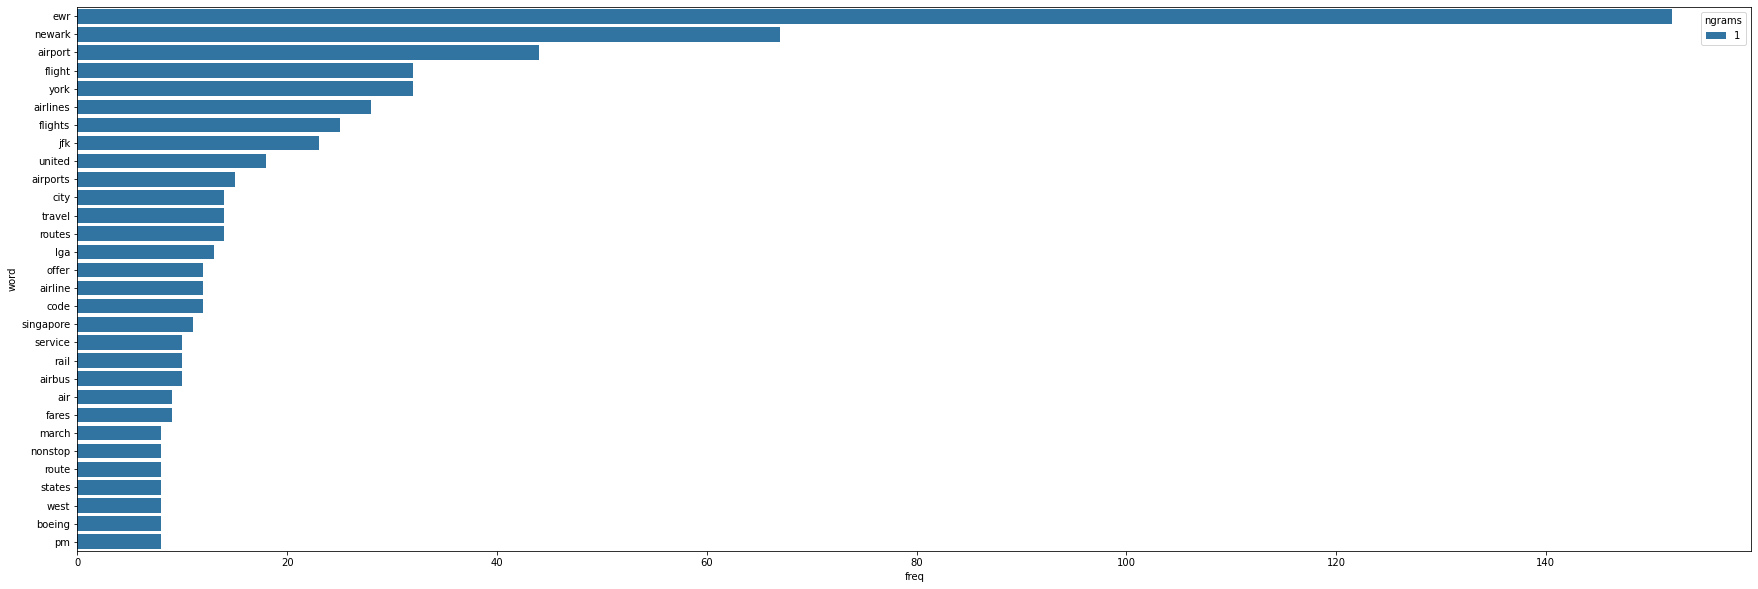

In [14]:
#negative word frequency
text = comment_words_negative
new_text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
text_tokens = word_tokenize(new_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
    dic_words_freq = nltk.FreqDist(nltk.ngrams(tokens_without_sw, n))
    dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
    dtf_n["ngrams"] = n
    dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: "".join(string for string in x) )
    dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
## plot
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()